# Final Experiment for Diploma thesis Bitcoin price prediction


#### Load all own need ipynb

In [145]:
%run Imports.ipynb
%run DataFrameBuilder.ipynb
%run ModelBuilder.ipynb
%run ModelEvaluator.ipynb

In [146]:
def RefreshImports():
    %run Imports.ipynb
    %run DataFrameBuilder.ipynb
    %run ModelBuilder.ipynb
    %run ModelEvaluator.ipynb

In [147]:
resultDf = Create2ClassResultDataframe()

In [148]:
SaveTwoClassResult(resultDf)

# Binary Classification - RF

In [149]:
resultDf = OpenTwoClassResult()

In [150]:
window_size = [ 0,1,2,3,5,8,13,21]
max_depth = [ x for x in range(5,6) ]
min_samples_split = [ x for x in range(2,3) ]
min_samples_leaf = [ x for x in range(1,3) ]

In [151]:
count = (len(window_size)*len(max_depth)*len(min_samples_leaf)*len(min_samples_split))
for i in window_size:
    for j in max_depth:
        for k in min_samples_split:
            for l in min_samples_leaf:
                count = count - 1 
                print(count, end='\r')
                if(i == 0):
                    df = LoadDifferencedDatasetForTwoClass()
                else:
                    df = LoadDifferencedDatasetForTwoClass()
                    df = CreateSlidingWindows(df, windowsize= i)
                    
                y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier = RandomForestClassifier(n_estimators=101, max_depth=j, min_samples_split=k, min_samples_leaf = l ), test_size=0.2)
                model = "Random Forest"
                param = f'window_size: {i} , max_depth: {j} ,min_samples_split: {k} ,min_samples_leaf: {l}'
                resultDf = CreateResultAndAppend(resultDf, model, param, y_test, y_pred)
                SaveTwoClassResult(resultDf)

# Binary Classification - GNB

In [159]:
resultDf = OpenTwoClassResult()

In [160]:
window_size = [ 0,1,2,3,5,8,13,21]

In [161]:
count = (len(window_size))
for i in window_size:
    count = count - 1 
    print(count, end='\r')
    if(i == 0):
        df = LoadDifferencedDatasetForTwoClass()
    else:
        df = LoadDifferencedDatasetForTwoClass()
        df = CreateSlidingWindows(df, windowsize= i)
    
    y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =  GaussianNB(), test_size=0.2 )    
    model = "GaussianNB"
    param = f'window_size: {i}'
    resultDf = CreateResultAndAppend(resultDf, model, param, y_test, y_pred)
    SaveTwoClassResult(resultDf)

# Binary Classification - SVC

In [162]:
resultDf = OpenTwoClassResult()

In [163]:
window_size = [ 0,1,2,3,5,8,13,21]
min_samples_split = [ x for x in range(2,3) ]

In [164]:
count = (len(window_size))
for i in window_size:
    count = count - 1 
    print(count, end='\r')
    if(i == 0):
        df = LoadDifferencedDatasetForTwoClass()
    else:
        df = LoadDifferencedDatasetForTwoClass()
        df = CreateSlidingWindows(df, windowsize= i)
    
    y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =svm.SVC(gamma='scale') , test_size=0.2 )    
    model = "SVC"
    param = f'window_size: {i}, gama: scale'
    resultDf = CreateResultAndAppend(resultDf, model, param, y_test, y_pred)
    SaveTwoClassResult(resultDf)

# Binary Classification - KNN

In [165]:
resultDf = OpenTwoClassResult()

In [166]:
window_size = [ 0,1,2,3,5,8,13,21]
n_neighbors = [ x for x in range(5,15) ]

In [167]:
count = (len(window_size)* len(n_neighbors))
for i in window_size:
    for j in n_neighbors:
        count = count - 1 
        print(count, end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetForTwoClass()
        else:
            df = LoadDifferencedDatasetForTwoClass()
            df = CreateSlidingWindows(df, windowsize= i)

        y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =KNeighborsClassifier(n_neighbors = j) , test_size=0.2 )    
        model = "KNN"
        param = f'window_size: {i}, n_neighbors: {j}'
        resultDf = CreateResultAndAppend(resultDf, model, param, y_test, y_pred)
        SaveTwoClassResult(resultDf)

In [168]:
resultDf = OpenTwoClassResult()

In [170]:
resultDf.Accuracy.max()

0.5770584095707249

### Result - binarka ako v Experimente c. 1 nevykazuje ziadne uspokojive vysledky RF dosahuje 55%

# Binary Classification - with history Sliding window 12 - 1/2 of last day

In [156]:
df = LoadDifferencedDatasetForTwoClass()
df = CreateSlidingWindows(df, windowsize=12)

### RandomForrest

In [157]:
_, _ = Predict(df,scaler = StandardScaler(), classifier = RandomForestClassifier(n_estimators=101, max_depth=15 ), test_size=0.2,)

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.51      0.48      0.49       682
        Rise       0.54      0.57      0.55       736

    accuracy                           0.52      1418
   macro avg       0.52      0.52      0.52      1418
weighted avg       0.52      0.52      0.52      1418

----------------Confusion_matrix--------------
[[327 355]
 [319 417]]
--------------------Accuracy------------------
0.5246826516220028


### GNN

In [158]:
clf, X_train = Predict(df,scaler = StandardScaler(), classifier =  GaussianNB())

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.47      0.22      0.30       851
        Rise       0.52      0.77      0.62       922

    accuracy                           0.51      1773
   macro avg       0.49      0.50      0.46      1773
weighted avg       0.49      0.51      0.47      1773

----------------Confusion_matrix--------------
[[191 660]
 [216 706]]
--------------------Accuracy------------------
0.505922165820643


### SVC

In [159]:
clf, X_train = Predict(df,scaler = StandardScaler(), classifier =  svm.SVC(gamma='scale'))

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.50      0.45      0.48       851
        Rise       0.54      0.59      0.56       922

    accuracy                           0.52      1773
   macro avg       0.52      0.52      0.52      1773
weighted avg       0.52      0.52      0.52      1773

----------------Confusion_matrix--------------
[[385 466]
 [380 542]]
--------------------Accuracy------------------
0.5228426395939086


### KNN

In [160]:
clf, X_train = Predict(df,scaler = StandardScaler() , classifier =  KNeighborsClassifier(n_neighbors = 6))

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.46      0.64      0.54       851
        Rise       0.49      0.32      0.39       922

    accuracy                           0.47      1773
   macro avg       0.48      0.48      0.46      1773
weighted avg       0.48      0.47      0.46      1773

----------------Confusion_matrix--------------
[[541 310]
 [627 295]]
--------------------Accuracy------------------
0.4715172024816695


# Three class classification - without any knowledge about history data

In [161]:
df = LoadDifferencedDatasetForThreeClass()

### RandomForrest

In [162]:
_, _ = Predict(df,scaler = StandardScaler(), classifier = RandomForestClassifier(n_estimators=101, max_depth=10, min_samples_split = 5 ), test_size=0.2,)

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.45      0.35      0.39       454
        Rise       0.43      0.38      0.40       493
        Stay       0.44      0.59      0.50       474

    accuracy                           0.44      1421
   macro avg       0.44      0.44      0.43      1421
weighted avg       0.44      0.44      0.43      1421

----------------Confusion_matrix--------------
[[158 135 161]
 [108 186 199]
 [ 84 112 278]]
--------------------Accuracy------------------
0.43771991555242784


### GNN

In [163]:
clf, X_train = Predict(df,scaler = StandardScaler(), classifier =  GaussianNB())

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.40      0.32      0.36       565
        Rise       0.35      0.05      0.09       610
        Stay       0.38      0.78      0.51       601

    accuracy                           0.38      1776
   macro avg       0.38      0.38      0.32      1776
weighted avg       0.38      0.38      0.32      1776

----------------Confusion_matrix--------------
[[181  23 361]
 [169  31 410]
 [100  34 467]]
--------------------Accuracy------------------
0.38231981981981983


### SVC

In [164]:
clf, X_train = Predict(df,scaler = StandardScaler(), classifier =  svm.SVC(gamma='scale'))

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.45      0.32      0.37       565
        Rise       0.42      0.37      0.39       610
        Stay       0.42      0.60      0.49       601

    accuracy                           0.43      1776
   macro avg       0.43      0.43      0.42      1776
weighted avg       0.43      0.43      0.42      1776

----------------Confusion_matrix--------------
[[179 162 224]
 [120 224 266]
 [100 143 358]]
--------------------Accuracy------------------
0.42849099099099097


### KNN

In [165]:
clf, X_train = Predict(df,scaler = StandardScaler() , classifier =  KNeighborsClassifier(n_neighbors = 6))

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.33      0.41      0.36       565
        Rise       0.36      0.29      0.32       610
        Stay       0.41      0.40      0.40       601

    accuracy                           0.36      1776
   macro avg       0.36      0.36      0.36      1776
weighted avg       0.37      0.36      0.36      1776

----------------Confusion_matrix--------------
[[229 172 164]
 [251 176 183]
 [222 140 239]]
--------------------Accuracy------------------
0.36261261261261263


#### Result - Klasifikácia do 3 tried  vykazuje omnoho lepšie hodnoty - Sme vzdialenejší od náhody RF 43-45% acc

# Three class classification - sliding window of size 12 

In [177]:
df = LoadDifferencedDatasetForThreeClass()
df = CreateSlidingWindows(df, windowsize=12)

### RandomForrest

In [178]:
_, _ = Predict(df,scaler = StandardScaler(), classifier = RandomForestClassifier(n_estimators=101, max_depth=10, min_samples_split = 5 ), test_size=0.2,)

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.39      0.22      0.28       481
        Rise       0.43      0.44      0.43       479
        Stay       0.43      0.63      0.51       458

    accuracy                           0.43      1418
   macro avg       0.42      0.43      0.41      1418
weighted avg       0.42      0.43      0.41      1418

----------------Confusion_matrix--------------
[[107 177 197]
 [ 91 209 179]
 [ 73  96 289]]
--------------------Accuracy------------------
0.42665726375176305


### GNN

In [179]:
clf, X_train = Predict(df,scaler = StandardScaler(), classifier =  GaussianNB())

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.37      0.20      0.26       588
        Rise       0.39      0.23      0.29       605
        Stay       0.38      0.72      0.50       580

    accuracy                           0.38      1773
   macro avg       0.38      0.38      0.35      1773
weighted avg       0.38      0.38      0.35      1773

----------------Confusion_matrix--------------
[[117 137 334]
 [115 141 349]
 [ 82  80 418]]
--------------------Accuracy------------------
0.38127467569091933


### SVC

In [180]:
clf, X_train = Predict(df,scaler = StandardScaler(), classifier =  svm.SVC(gamma='scale'))

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.39      0.26      0.31       588
        Rise       0.40      0.37      0.39       605
        Stay       0.42      0.60      0.49       580

    accuracy                           0.41      1773
   macro avg       0.40      0.41      0.40      1773
weighted avg       0.40      0.41      0.40      1773

----------------Confusion_matrix--------------
[[151 191 246]
 [149 225 231]
 [ 89 145 346]]
--------------------Accuracy------------------
0.40721940214326


### KNN

In [181]:
clf, X_train = Predict(df,scaler = StandardScaler() , classifier =  KNeighborsClassifier(n_neighbors = 6))

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.34      0.41      0.37       588
        Rise       0.33      0.24      0.28       605
        Stay       0.39      0.42      0.40       580

    accuracy                           0.36      1773
   macro avg       0.35      0.36      0.35      1773
weighted avg       0.35      0.36      0.35      1773

----------------Confusion_matrix--------------
[[240 160 188]
 [263 148 194]
 [198 139 243]]
--------------------Accuracy------------------
0.3558939650310209


# Linear regression

In [445]:
df = LoadDifferencedDatasetWithTarget(target = 'percentage')

LR score>>>
0.060517023797097114


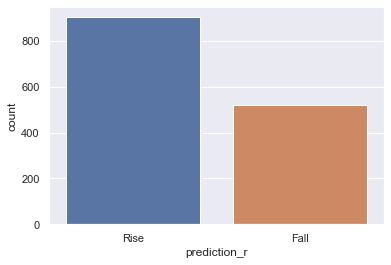

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.60      0.45      0.51       695
        Rise       0.57      0.71      0.64       726

    accuracy                           0.58      1421
   macro avg       0.59      0.58      0.57      1421
weighted avg       0.59      0.58      0.58      1421

----------------Confusion_matrix--------------
[[311 384]
 [207 519]]
--------------------Accuracy------------------
0.5840957072484166


In [446]:
RegressionPredictTwoClass(df, ratio=0.80)

In [447]:
df = LoadDifferencedDatasetWithTarget(target = 'percentage')

In [448]:
df = CreateSlidingWindows(df, windowsize=12)

LR score>>>
0.11716051124470828


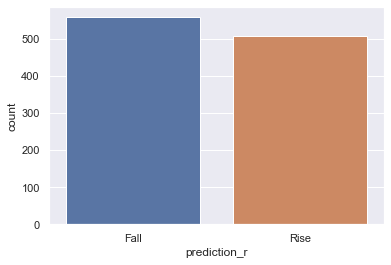

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.54      0.59      0.56       510
        Rise       0.58      0.53      0.56       554

    accuracy                           0.56      1064
   macro avg       0.56      0.56      0.56      1064
weighted avg       0.56      0.56      0.56      1064

----------------Confusion_matrix--------------
[[300 210]
 [258 296]]
--------------------Accuracy------------------
0.5601503759398496


In [449]:
RegressionPredictTwoClass(df, ratio=0.85)

In [450]:
df = LoadDifferencedDatasetWithTarget(target = 'percentage')

LR score>>>
0.060517023797097114


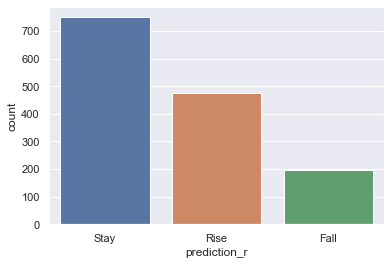

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.53      0.19      0.28       563
        Rise       0.52      0.42      0.47       585
        Stay       0.21      0.57      0.30       273

    accuracy                           0.36      1421
   macro avg       0.42      0.39      0.35      1421
weighted avg       0.47      0.36      0.36      1421

----------------Confusion_matrix--------------
[[105 145 313]
 [ 57 247 281]
 [ 35  82 156]]
--------------------Accuracy------------------
0.3574947220267417


In [451]:
RegressionPredictThreeClass(df, ratio=0.8, stay_boundary=0.1)

In [461]:
df = LoadDifferencedDatasetWithTarget(target = 'percentage')

In [462]:
#df = CreateSlidingWindows(df, windowsize=12)

LR score>>>
0.060517023797097114


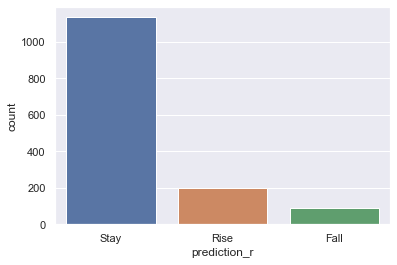

---------------------Summary------------------
              precision    recall  f1-score   support

        Fall       0.46      0.09      0.15       442
        Rise       0.41      0.18      0.25       452
        Stay       0.38      0.82      0.52       527

    accuracy                           0.39      1421
   macro avg       0.42      0.36      0.31      1421
weighted avg       0.41      0.39      0.32      1421

----------------Confusion_matrix--------------
[[ 40  49 353]
 [ 21  81 350]
 [ 26  69 432]]
--------------------Accuracy------------------
0.3891625615763547


In [463]:
RegressionPredictThreeClass(df, ratio=0.8, stay_boundary=0.2)

# ARIMA Model

In [58]:
RefreshImports()

In [59]:
df = LoadDifferencedDatasetWithTarget(replace_old=True, target = 'value')

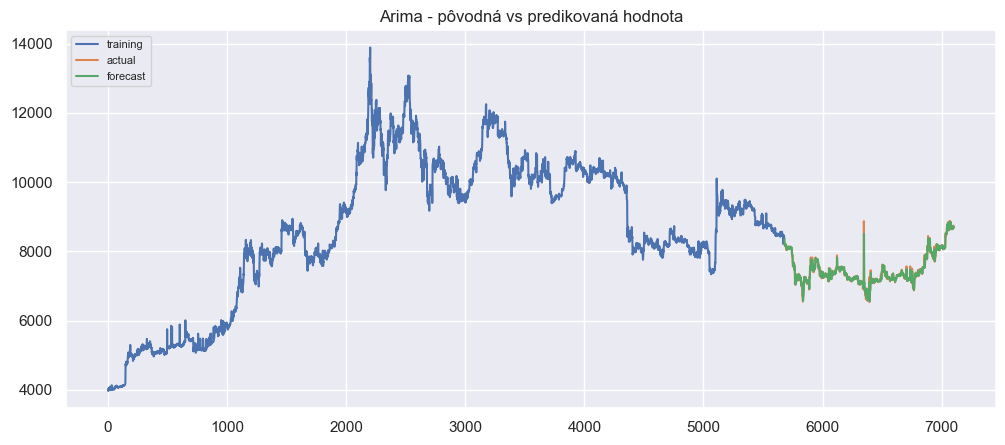

In [60]:
rdf = DefArima(df, splitRatio = 0.8, p = 1, d = 0, q = 1)